# 1st partial
# Roberto Ramírez Monroy 	A01366943
# Alitzel Macías Infante		A01373166

# Decison Trees

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from functools import reduce

In [2]:
# load dataset
occupation = pd.read_csv("ds-home-5min-avg.csv")

In [3]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [4]:
acc = np.zeros((1,50))
for i in range(50):
    
    #split dataset in features and target variable
    feature_cols = ['pre', 'hum', 'tem']
    X = occupation[feature_cols] # Features (independent variables)
    y = occupation.occ # Target variable
    # Split dataset into training set and test set
    # 80% training and 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="entropy",max_depth=11)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    acc[0,i]=metrics.accuracy_score(y_test, y_pred) 

    var_name = 'var{}'.format(i)
    locals()[var_name] = classification_report(y_test, y_pred)

np.average(acc)

0.9242786069651743

In [5]:
print("Accuracy:", np.average(acc))
print(classification_report(y_test, y_pred))

Accuracy: 0.9242786069651743
              precision    recall  f1-score   support

           E       0.93      0.90      0.91        29
           H       1.00      0.60      0.75         5
           L       0.95      0.94      0.95       143
           M       0.71      0.83      0.77        24

    accuracy                           0.92       201
   macro avg       0.90      0.82      0.84       201
weighted avg       0.92      0.92      0.92       201



Text(0.5, 257.44, 'Predicted label')

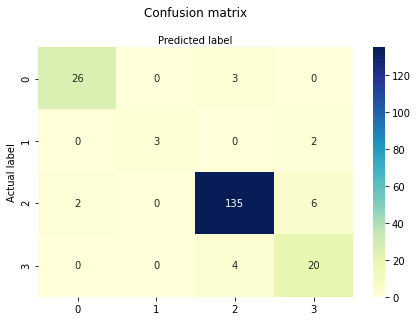

In [6]:
# Confussion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=['E','L','M','H']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

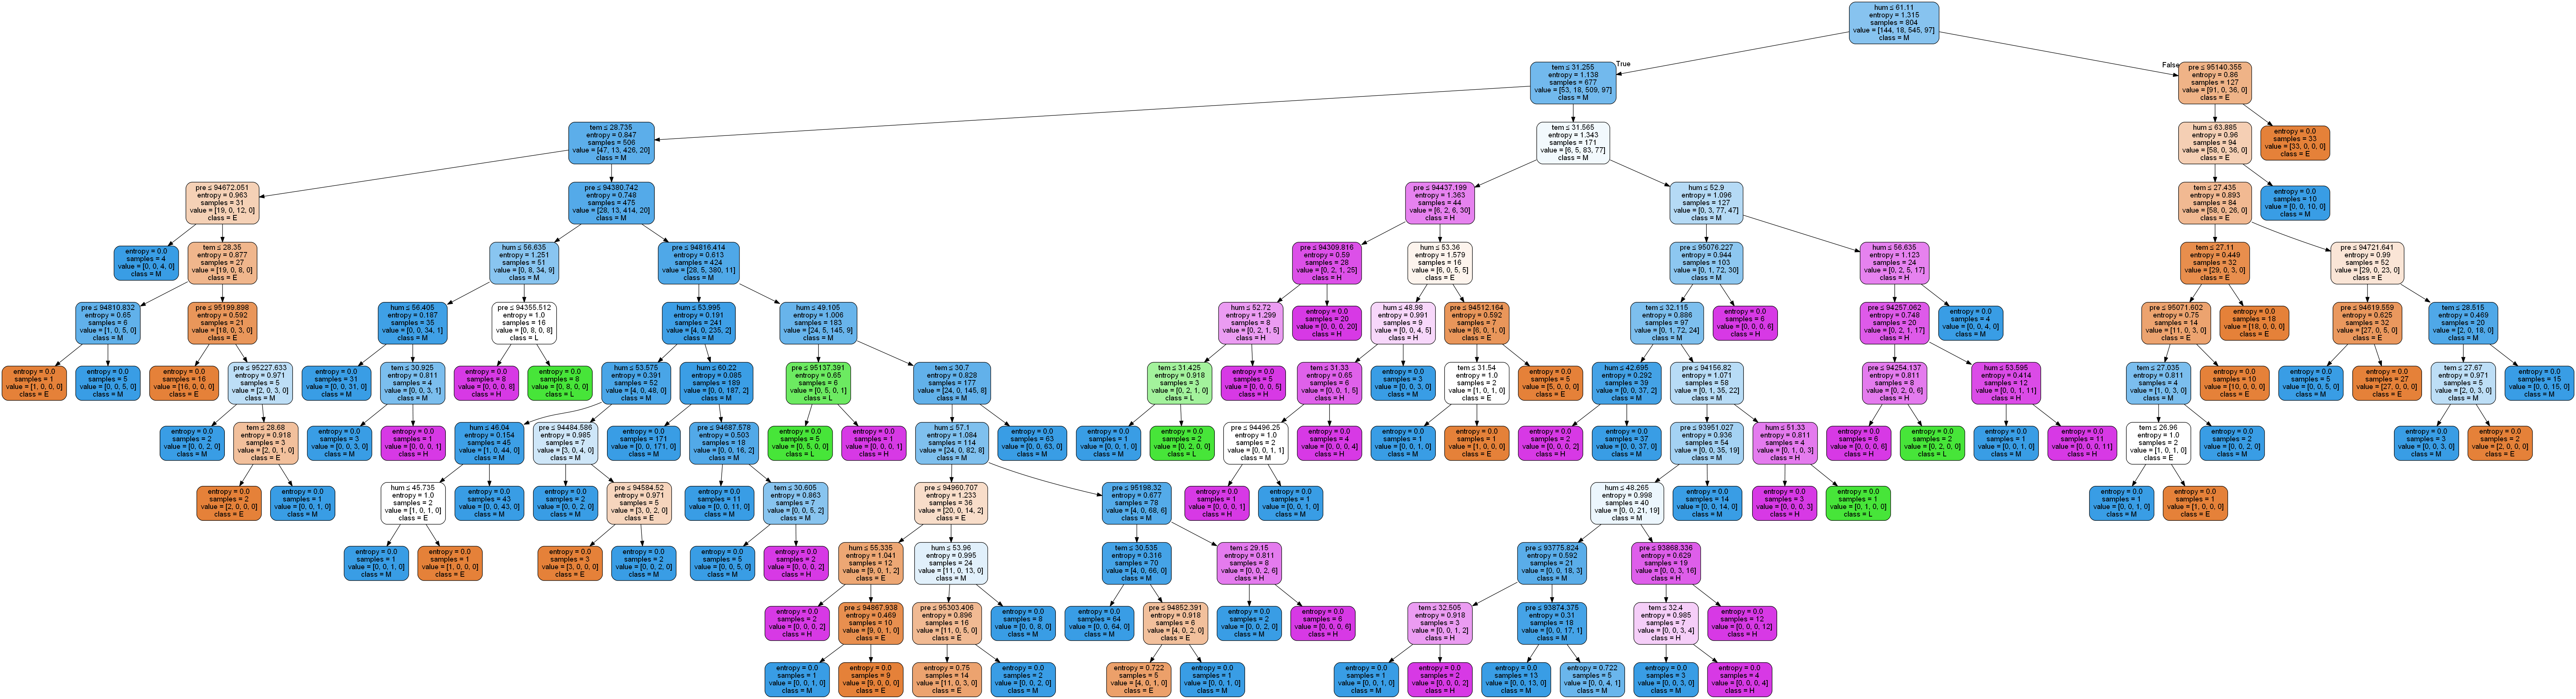

In [7]:
# Plot
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['E','L','M','H'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('occupation.png')
Image(graph.create_png())

# Data Analysis

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [14]:
df = pd.read_csv("ds-home-5min-avg.csv")
df['newDate']=pd.to_datetime(df['date'],  infer_datetime_format=True)
df['time'] = [d.time() for d in df['newDate']]
df['day'] = [d.date() for d in df['newDate']]
df=df.sort_values(by=['newDate'])
df.info()


df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 325 to 363
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1005 non-null   object        
 1   pre      1005 non-null   float64       
 2   hum      1005 non-null   float64       
 3   tem      1005 non-null   float64       
 4   occ      1005 non-null   object        
 5   newDate  1005 non-null   datetime64[ns]
 6   time     1005 non-null   object        
 7   day      1005 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 70.7+ KB


date       pre    hum    tem occ             newDate  \
325  14/05/2020 21:05  94269.77  54.45  30.99   L 2020-05-14 21:05:00   
833  14/05/2020 21:10  94266.83  54.26  31.01   L 2020-05-14 21:10:00   
46   14/05/2020 21:15  94272.60  54.85  31.01   L 2020-05-14 21:15:00   
352  14/05/2020 21:20  94271.31  55.12  30.92   L 2020-05-14 21:20:00   
431  14/05/2020 21:25  94274.32  55.42  30.90   L 2020-05-14 21:25:00   

         time         day  
325  21:05:00  2020-05-14  
833  21:10:00  2020-05-14  
46   21:15:00  2020-05-14  
352  21:20:00  2020-05-14  
431  21:25:00  2020-05-14

<AxesSubplot:>

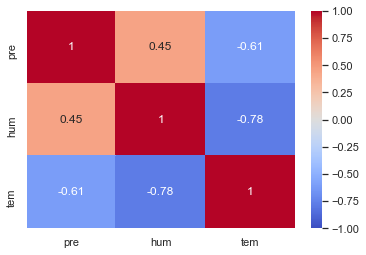

In [10]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

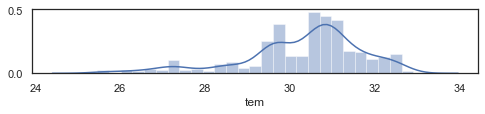

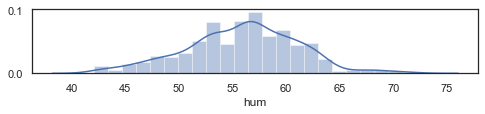

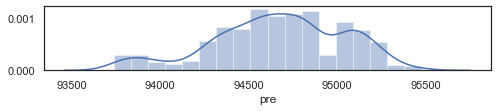

In [11]:
plt.figure(figsize=(8, 4))
plt.subplot(3, 1, 1)
sns.distplot(df['tem']);
plt.figure(figsize=(8, 4))
plt.subplot(3, 1, 2)
sns.distplot(df['hum']);
plt.figure(figsize=(8, 4))
plt.subplot(3, 1, 3)
sns.distplot(df['pre']);

In [29]:
names = df['occ']
names.unique()

array(['L', 'M', 'H', 'E'], dtype=object)

In [30]:
df['occ'].value_counts()


L    688
E    173
M    121
H     23
Name: occ, dtype: int64

In [31]:
L = df.loc[df['occ'] == 'L']
L = L.iloc[:150]
Else = df.loc[df['occ'] != 'L']
df = pd.concat([L, Else])

In [32]:
df['occ'].value_counts()
#g = df.groupby('occ')
#df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

E    173
L    150
M    121
H     23
Name: occ, dtype: int64

In [33]:
fig = px.scatter_3d(df, x='pre', y='hum', z='tem', color='occ')
fig.show()

In [34]:
feature_names = ['pre','hum','tem']
X = df[feature_names]
y = df['occ']

In [35]:
y

325    L
833    L
46     L
352    L
431    L
      ..
43     E
152    E
336    E
69     M
363    M
Name: occ, Length: 467, dtype: object

# NEURAL NETWORKS


## First approach (Just numeric data)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [37]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

C:\Users\rober\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [38]:
Y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [39]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_scaled

array([[-0.57924803, -0.10511153,  0.33292122],
       [-0.58602644, -0.13595635,  0.34395794],
       [-0.57272323, -0.04017508,  0.34395794],
       ...,
       [ 0.09331338,  0.27314329,  0.6364309 ],
       [ 0.15976026,  0.24392189,  0.82405506],
       [ 0.16769147,  0.23255801,  0.85164685]])

In [41]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2)

In [42]:
n_features = X.shape[1]
n_classes = Y.shape[1]
print(n_features)
print(n_classes)

3
4


In [43]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(3,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='softmax'))

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
              
hc = model.fit(X_train, Y_train,epochs=100, batch_size=1, verbose=0, validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
Total params: 212
Trainable params: 212
Non-trainable params: 0
_________________________________________________________________


In [45]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

117/117 [==============================] - 0s 69us/step
[0.45929446026810217, 0.8461538553237915]


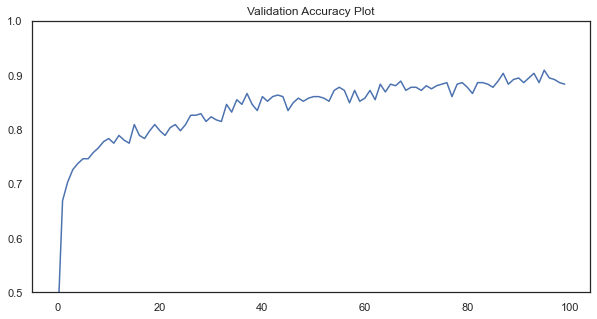

In [46]:
plt.figure(figsize=(10, 5))

val_acc = hc.history['accuracy']
plt.plot(val_acc)

plt.title("Validation Accuracy Plot")
plt.ylim(0.5, 1)
plt.show()

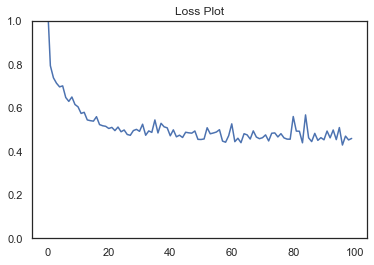

In [47]:
val_loss = hc.history['val_loss']
plt.plot(val_loss)
    
plt.title("Loss Plot")
plt.ylim(0, 1)
plt.show()

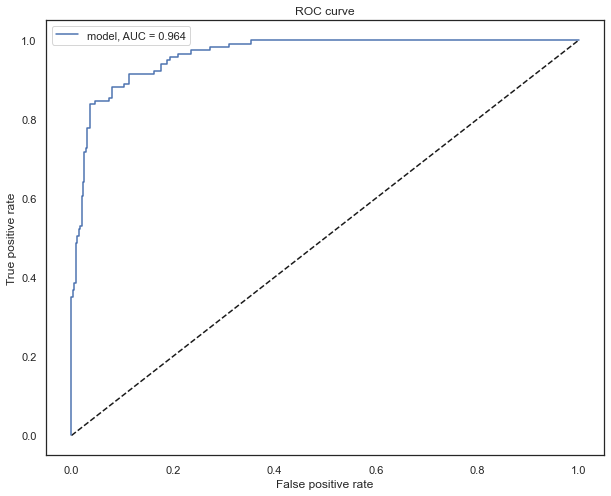

In [48]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')

    
Y_pred = model.predict(X_test)
fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format('model', auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

<AxesSubplot:>

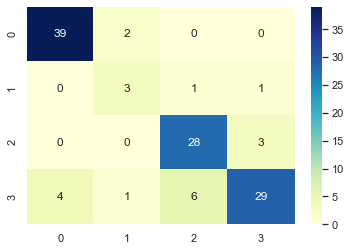

In [49]:
from sklearn import metrics
Y_pred1 = model.predict_classes(X_test)
Y_t=np.argmax(Y_test, axis=1)
cnf_matrix = metrics.confusion_matrix(Y_t, Y_pred1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')


## Second approach (Using Dates)

In this second iteration of Neural network approach we are going to use the 3 numerical features as well as the dates, but we will just use the day of week and the hour.
Also, for the hours we are going to encode it as cyclic data, using sine and cosine instead of the hour.

In [18]:
df = pd.read_csv("ds-home-5min-avg.csv")
df['newDate']=pd.to_datetime(df['date'],  infer_datetime_format=True)
df['hour'] = [d.time() for d in df['newDate']]
df['day'] = [d.date() for d in df['newDate']]
df['day'] = df['newDate'].dt.day_name()
df['hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

df['sin_hour'] = np.sin(2*np.pi*df.hour/24)
df['cos_hour'] = np.cos(2*np.pi*df.hour/24)

df=df.sort_values(by=['newDate'])

df.head()

date       pre    hum    tem occ             newDate  hour  \
325  14/05/2020 21:05  94269.77  54.45  30.99   L 2020-05-14 21:05:00    21   
833  14/05/2020 21:10  94266.83  54.26  31.01   L 2020-05-14 21:10:00    21   
46   14/05/2020 21:15  94272.60  54.85  31.01   L 2020-05-14 21:15:00    21   
352  14/05/2020 21:20  94271.31  55.12  30.92   L 2020-05-14 21:20:00    21   
431  14/05/2020 21:25  94274.32  55.42  30.90   L 2020-05-14 21:25:00    21   

          day  sin_hour  cos_hour  
325  Thursday -0.707107  0.707107  
833  Thursday -0.707107  0.707107  
46   Thursday -0.707107  0.707107  
352  Thursday -0.707107  0.707107  
431  Thursday -0.707107  0.707107

Plotting the hours sine and cosine to see the cycle

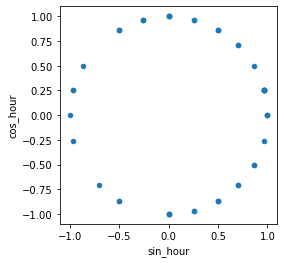

In [19]:
df.sample(50).plot.scatter('sin_hour','cos_hour').set_aspect('equal');


Counting how many data we have for each class

In [20]:
df['occ'].value_counts()

L    688
E    173
M    121
H     23
Name: occ, dtype: int64

In [21]:
df['day'].value_counts()

Thursday     403
Monday       236
Wednesday    121
Friday       116
Tuesday       98
Sunday        31
Name: day, dtype: int64

In [22]:
df['hour'].value_counts()

2     72
3     72
4     72
5     72
6     72
1     55
7     50
0     48
12    48
9     48
8     46
11    46
23    40
10    39
22    36
19    36
21    35
20    26
18    23
13    17
15    15
16    13
14    12
17    12
Name: hour, dtype: int64

And plotting a scatter plot of hour, day and temperature

In [23]:
fig = px.scatter_3d(df, x='hour', y='day', z='tem', color='occ')
fig.show()

Getting the correlation matrix of the new features

<AxesSubplot:>

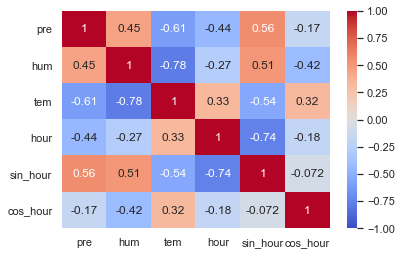

In [24]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

And the histograms of the features

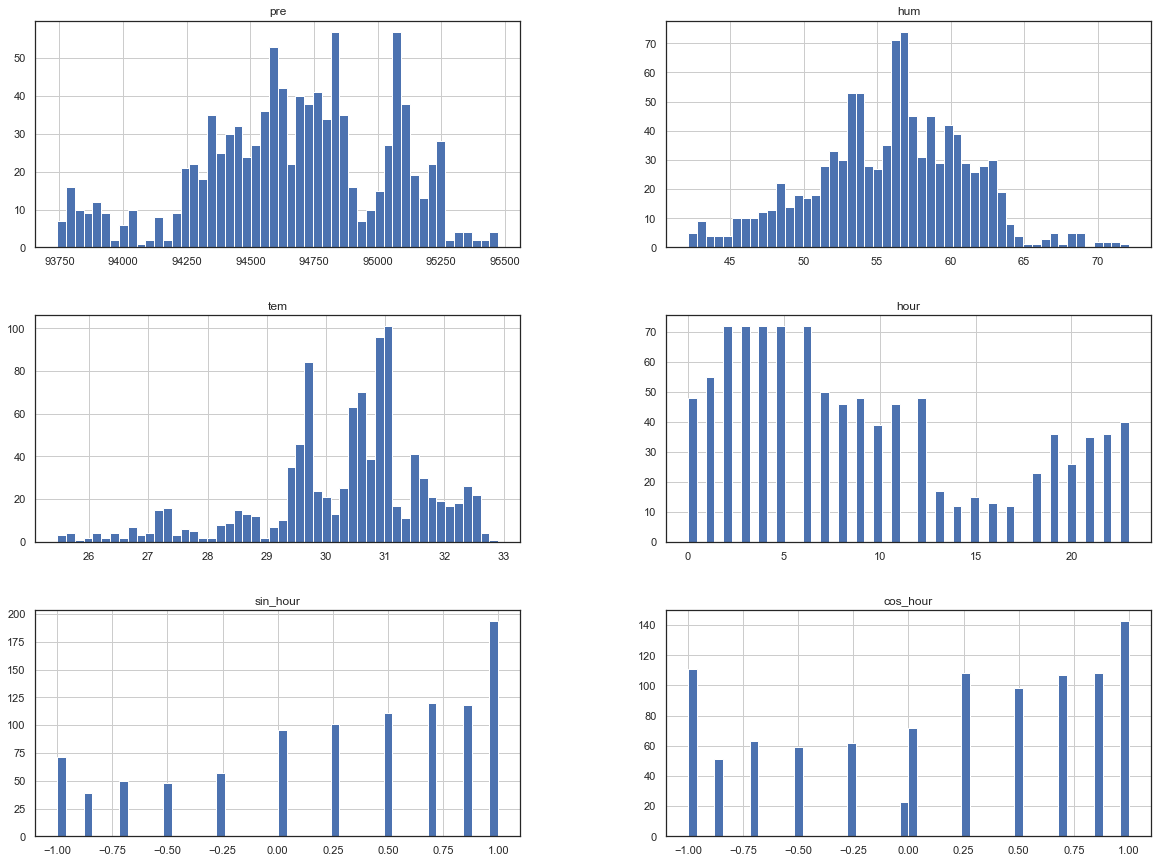

In [25]:
df.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='occ', ylabel='count'>

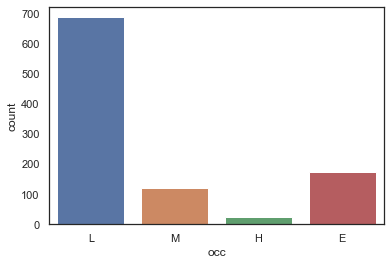

In [26]:
sns.countplot(x ='occ', data = df) 


<AxesSubplot:xlabel='day', ylabel='count'>

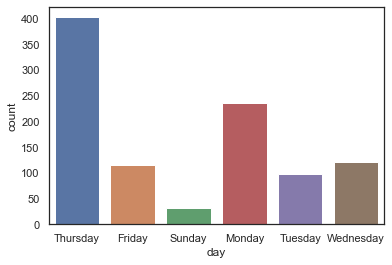

In [27]:
sns.countplot(x ='day', data = df) 

Plotting a 2d scatter of just the day and hour, to see if the model could be a time series

In [28]:
fig = px.scatter(df, x='hour', y='day', color='occ')
fig.show()

Selecting the features to feed the neural network, creating dummies for the day of week value, where we have just 5 columns generated

In [37]:
feature_names = ['pre','hum','tem','day','sin_hour','cos_hour']
X = df[feature_names]
y = df['occ']
X = pd.get_dummies(X, drop_first=True)
X

pre    hum    tem  sin_hour  cos_hour  day_Monday  day_Sunday  \
325  94269.77  54.45  30.99 -0.707107  0.707107           0           0   
833  94266.83  54.26  31.01 -0.707107  0.707107           0           0   
46   94272.60  54.85  31.01 -0.707107  0.707107           0           0   
352  94271.31  55.12  30.92 -0.707107  0.707107           0           0   
431  94274.32  55.42  30.90 -0.707107  0.707107           0           0   
..        ...    ...    ...       ...       ...         ...         ...   
809  94573.86  56.85  31.57 -0.500000  0.866025           0           0   
845  94581.41  56.67  31.69 -0.500000  0.866025           0           0   
318  94585.56  56.70  31.78 -0.500000  0.866025           0           0   
69   94590.30  56.60  31.88 -0.258819  0.965926           0           0   
363  94593.74  56.53  31.93 -0.258819  0.965926           0           0   

     day_Thursday  day_Tuesday  day_Wednesday  
325             1            0              0  
833             1            0              0  
46              1            0              0  
352             1            0              0  
431             1            0              0  
..            ...          ...            ...  
809             1            0              0  
845             1            0              0  
318             1            0              0  
69              1            0              0  
363             1            0              0  

[1005 rows x 10 columns]

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Creating the dummies for the occupancy classes

In [39]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

C:\Users\rober\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Scaling the input data to have mean=0 and var=1

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Splitting the data to test and train, where we are going to use 75% at training and 25% at testing

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2)

The number of features and classes of our model

In [42]:
n_features = X.shape[1]
n_classes = Y.shape[1]
print(n_features)
print(n_classes)

10
4


Since we are getting more input nodes in the input layer, we decided to use more neurons in the hidden layers, where 32 turned to be ok and having a good training time, also not more where added to avoid possible overfitting with new data.

In [48]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(10,)))

model.add(Dense(32, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(4, activation='softmax'))

For this model, we are using ADAM optimizer, and 100 epochs

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

model.summary()

hc = model.fit(X_train, Y_train,epochs=100, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 132       
Total params: 2,596
Trainable params: 2,596
Non-trainable params: 0
_________________________________________________________________
Train on 753 samples, validate on 252 samples
Epoch 1/100
753/753 [==============================] - 2s 3ms/step - loss: 0.2443 - accuracy: 0.8858 - recall_2: 0.8908 - precision: 0.8961 - val_loss: 0.3185 - val_accuracy: 0.9008 - val_recall_2: 0.8849

Epoch 33/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1911 - accuracy: 0.9203 - recall_2: 0.9011 - precision: 0.9055 - val_loss: 0.3711 - val_accuracy: 0.8968 - val_recall_2: 0.9014 - val_precision: 0.9057
Epoch 34/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1921 - accuracy: 0.9137 - recall_2: 0.9016 - precision: 0.9058 - val_loss: 0.3736 - val_accuracy: 0.9048 - val_recall_2: 0.9017 - val_precision: 0.9059
Epoch 35/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1909 - accuracy: 0.9190 - recall_2: 0.9018 - precision: 0.9060 - val_loss: 0.3678 - val_accuracy: 0.8889 - val_recall_2: 0.9019 - val_precision: 0.9061
Epoch 36/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1816 - accuracy: 0.9177 - recall_2: 0.9021 - precision: 0.9062 - val_loss: 0.3918 - val_accuracy: 0.8889 - val_recall_2: 0.9022 - val_precision: 0.9062
Epoch 37/100
753/753 [==============================] - 2s 3ms/step - loss: 0.19

Epoch 69/100
753/753 [==============================] - 3s 3ms/step - loss: 0.1600 - accuracy: 0.9190 - recall_2: 0.9077 - precision: 0.9105 - val_loss: 0.3987 - val_accuracy: 0.8889 - val_recall_2: 0.9077 - val_precision: 0.9106
Epoch 70/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1513 - accuracy: 0.9402 - recall_2: 0.9079 - precision: 0.9107 - val_loss: 0.3962 - val_accuracy: 0.8849 - val_recall_2: 0.9080 - val_precision: 0.9108
Epoch 71/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1657 - accuracy: 0.9203 - recall_2: 0.9080 - precision: 0.9108 - val_loss: 0.3915 - val_accuracy: 0.9008 - val_recall_2: 0.9081 - val_precision: 0.9109
Epoch 72/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1630 - accuracy: 0.9203 - recall_2: 0.9082 - precision: 0.9109 - val_loss: 0.3653 - val_accuracy: 0.9127 - val_recall_2: 0.9082 - val_precision: 0.9110
Epoch 73/100
753/753 [==============================] - 2s 3ms/step - loss: 0.15

We check the score of the test data, giving a ~90% score on accuracy, precision and recall :D

In [52]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

252/252 [==============================] - 0s 59us/step
[0.39221064060453387, 0.908730149269104, 0.911833643913269, 0.9141862392425537]


Plot the accuracy in the epochs, here we can see that it is not a smooth line, which means that the network struggled a little, but we can see that it has a positive trend overall.

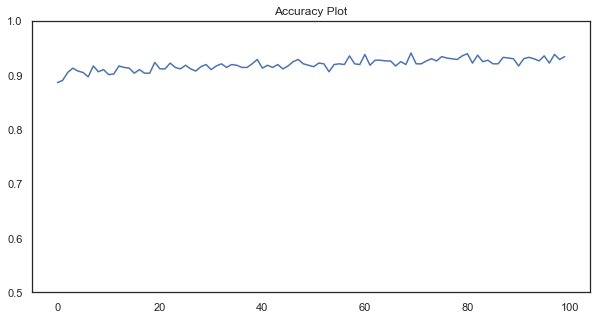

In [53]:
plt.figure(figsize=(10, 5))

val_acc = hc.history['accuracy']
plt.plot(val_acc)

plt.title("Accuracy Plot")
plt.ylim(0.5, 1)
plt.show()

When we plot the validation loss, we can see that it has a little negative trend, which is a good sign, but overall it was more than what we expected

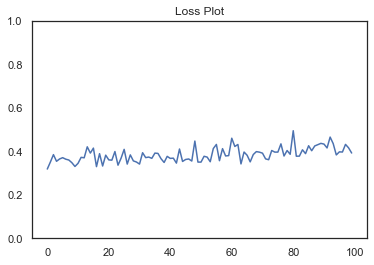

In [54]:
val_loss = hc.history['val_loss']
plt.plot(val_loss)
    
plt.title("Loss Plot")
plt.ylim(0, 1)
plt.show()

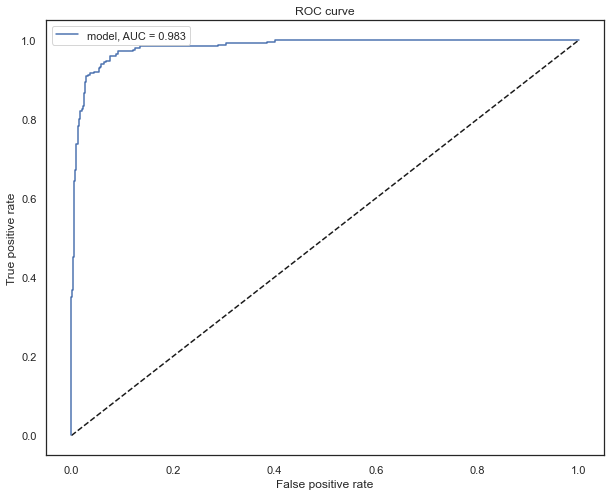

In [55]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')

    
Y_pred = model.predict(X_test)
fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format('model', auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

And we plot the confussion matrix for the validation set, and the entire set, where we can see good results.

<AxesSubplot:>

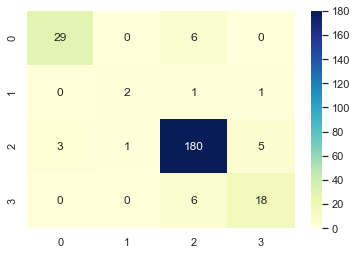

In [56]:
from sklearn import metrics
Y_pred1 = model.predict_classes(X_test)
Y_t=np.argmax(Y_test, axis=1)
cnf_matrix = metrics.confusion_matrix(Y_t, Y_pred1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')


<AxesSubplot:>

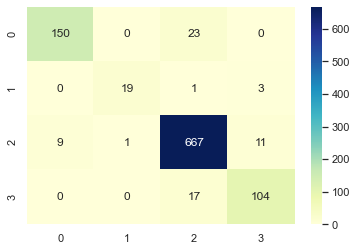

In [57]:
Y_total = model.predict_classes(X_scaled)
Y_l=np.argmax(Y, axis=1)
cnf_matrix = metrics.confusion_matrix(Y_l, Y_total)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

# SVM

## First approach (polynomial kernel)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm



feature_cols = ['pre','tem','hour','hum']
X = df[feature_cols]
y = df.occ 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

poly = Pipeline([("scaler", StandardScaler()),
                ("svm_clf", SVC(kernel="poly", degree=8, C=1))]).fit(X_train, y_train)

y_pred = poly.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred, average='weighted'))
print('Precision:', metrics.precision_score(y_test, y_pred, average='weighted'))
print('\n Report:\n', metrics.classification_report(y_test, y_pred))

Accuracy: 0.8253968253968254
F1 score: 0.808237508577067
Recall: 0.8253968253968254
Precision: 0.814128072639421

 Report:
               precision    recall  f1-score   support

           E       0.77      0.49      0.60        35
           H       0.50      0.25      0.33         4
           L       0.84      0.95      0.89       189
           M       0.71      0.42      0.53        24

    accuracy                           0.83       252
   macro avg       0.71      0.53      0.59       252
weighted avg       0.81      0.83      0.81       252



<AxesSubplot:>

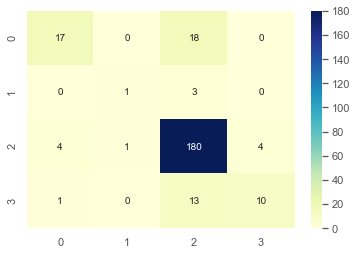

In [81]:
cnf = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')

## Second approach (rbf kernel)

In [35]:
Linear = svm.SVC(kernel='rbf', gamma=0.01, C=1)
models = (Linear.fit(X_train, y_train))

y_pred = Linear.predict(X_test)

#plot_decision_regions(X, y, clf=svm, legend=2)
#plt.show()

Accuracy: 0.8452380952380952
              precision    recall  f1-score   support

           E       0.81      0.63      0.71        35
           H       1.00      0.25      0.40         4
           L       0.87      0.95      0.91       189
           M       0.62      0.42      0.50        24

    accuracy                           0.85       252
   macro avg       0.83      0.56      0.63       252
weighted avg       0.84      0.85      0.83       252



Text(0.5, 257.44, 'Predicted label')

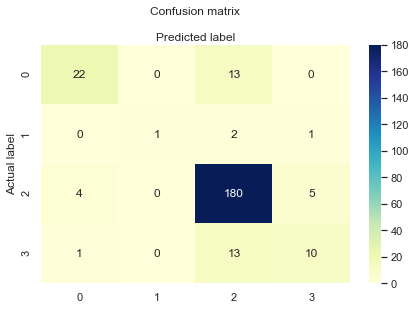

In [36]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confussion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=['E','L','M','H']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')